# Version du 22/11/23

Ce notebook vise à présenter le fonctionnement du systême biodiversité et son implémentation en Python.


In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model

## Sous-systèmes niveau 1

Note - mettre vrai jeu de données, ajouter facteur espèces invasives un peu partout

Demander à Thierry comment mettre en place les boucles (est ce qu'on est obligé de tout changer à leur code)

### Biodiversité en ville - inspiré du “ City Biodiversity Index ” (CBI) et des indicateurs de Singapour

1. Pourcentage de zones “ naturelles ”
2. Mesure de la fragmentation urbaine
3. Nombre d'espèces végétales
4. Nombre d'espèces animales
5. Part des aires protégées
6. Proportion d'espèces végétales exotiques envahissantes
7. Régulation de la quantité d'eau
8. Proportion du couvert arboré
9. Superficie d'espaces verts urbains pour mille habitants
10. Existence de plans d'actions en faveur de la biodiversité
11. Nombre d’organismes et/ou de partenariats liés à la biodiversité
12. Existence de processus de consultation formels ou informels liés à la biodiversité

Nous nous interessons alors aux paramètres qui peuvent le plus affecter la variation de biodiversité c'est-à-dire les investissements publics (critères 10 à 12), la proportion de parcs (espaces naturels/protégés - critères 1, 5), la densité de verdure (critère 9). On ajoute également la prise en compte des animaux domestiques (particulièrement importants en ville) et espèces invasives. On mesure ensuite l'évolution de la biodiversité (peut-être prendre CBI quand on aura des données)

In [2]:
#prendre des vraies valeurs...
data_urban = [(0,0,0,0,-0.2), #statut quo ?
                (0,0.5,1,1,0.6), #on double la superficie des parcs et la densité de verdure (donc l'investissement) ->aug de biodiv
                 (1,0.5,-0.5,0,-0.3) #plus d'espèces invasives, autant d'arbres/personne, moins d'espaces naturels ->perte de biodiv
                   ]

df_urban = pd.DataFrame(data_urban, columns = ["InvasiveSpecies", "PublicPolicies","%ParksAreas","DensityGreen","BiodivEvo"])
x_urban = df_urban.drop("BiodivEvo",axis=1).to_numpy()
y_urban = df_urban['BiodivEvo']

model_urban = linear_model.LinearRegression()
model_urban = model_urban.fit(x_urban,y_urban)

### Biodiversity in the mountains

1. Climatic Factors
  1. Pluviometry
  2. Temperature
2. Human Factors
  1. Livestock
  2. Tourism
  3. Policies
  4. Urbanisation


In [3]:
data_mountains = [(0.5,0,0,0,0,0,0.1), #the biodiv index increases with the pluviometry
                  (0,0.1,0,0,0,0,-0.1), #the biodiv index decreases with the temperature (especially in the moutains where the coldness matters)
                  (0,0,0.1,0,0,0,-0.01), #livestock is a pressure to biodiversity (little)
                  (0,0,0,0.1,0,0,-0.1), #tourism is a pressure to biodiversity (big)
                  (0,0,0,0,-0.1,0.1,-0.1) #a urbanisation policy have a bad impact on biodiversity
                  ]

df_mountains = pd.DataFrame(data_mountains, columns = ["Pluviometry", "Temperature","Livestock","Tourism","Policies","Urbanisation", "BiodivIndex"])
x_mountains = df_mountains.drop("BiodivIndex",axis=1).to_numpy()
y_mountains = df_mountains['BiodivIndex']

model_mountains = linear_model.LinearRegression()
model_mountains = model_mountains.fit(x_mountains,y_mountains)

print(model_mountains.coef_)

[ 0.34463277 -0.27683616  0.62316384 -0.27683616  0.13841808 -0.13841808]


### Biodiversity in the forests

1. Climatic Factors
    1. Pluviometry
    2. Dryness
    3. Soil Humidity
2. Human Factors
   1. Agriculture
   2. Livestock
   3. Forestry
   4. Urbanisation
   5. Soil Transformation
   6. Hunting / Poaching
   7. Policies


In [4]:
data_forests = pd.read_csv("data_initial/Forests_Parameters.csv", sep=";", decimal=",")

df_forests = pd.DataFrame(data_forests, columns = ["Pluviometry", "Dryness", "Soil Humidity", "Agriculture", "Livestock", "Forestry", "Urbanisation", "Soil Transformation", "Hunting / Poaching", "Policies", "BHI"])
x_forests = df_forests.drop("BHI",axis=1).to_numpy()

y_forests = df_forests['BHI']
model_forests = linear_model.LinearRegression()
model_forests = model_forests.fit(x_forests,y_forests)

print(model_forests.coef_)

[ 1.15809442 -0.47238014 -2.73142612 -1.13263617 -0.36846829  1.70165669
  0.24006116 -1.19904844 -0.44968281 -1.71134866]


### Biodiversity in the Meadows

1. Climatic Factors
    1. Pluviometry
    2. Dryness
    3. Soil Humidity
2. Human Factors
    1. Agriculture
    2. Livestock
    3. Forestry
    4. Urbanisation
    5. Soil Transformation
    6. Hunting / Poaching
    7. Policies

In [5]:
data_meadows = pd.read_csv("data_initial/Meadows.csv", sep=";", decimal=",")

df_meadows = pd.DataFrame(data_meadows)
x_meadows = df_meadows.drop("BHI",axis=1).to_numpy()
y_meadows = df_meadows['BHI']

model_meadows = linear_model.LinearRegression()
model_meadows = model_meadows.fit(x_meadows,y_meadows)

print(model_meadows.coef_)

[ 0.09401716  0.66412851  0.63728532  0.01141174 -0.16303284 -0.23800196
 -0.41457428  0.66984105]


# Biodiversity in the Savanas

1. Climatic Factors
    1. Pluviometry
    2. Dryness
    3. Soil Humidity
2. Human Factors
    1. Agriculture
    2. Livestock
    3. Forestry
    4. Urbanisation
    5. Soil Transformation
    6. Hunting / Poaching
    7. Policies

In [6]:
data_savana = pd.read_csv("data_initial/Savana.csv", sep=";", decimal=",")

df_savana = pd.DataFrame(data_savana)
x_savana = df_savana.drop('BHI',axis=1).to_numpy()
y_savana = df_savana['BHI']

model_savana = linear_model.LinearRegression()
model_savana = model_savana.fit(x_savana,y_savana)

print(model_savana.coef_)

[ 0.22850445 -0.22850445 -0.17149555 -0.2        -0.2         0.12358181
  0.18068448  0.90426629]


### Biodiversity in the fresh waters

1. Climatic Factors
    1. Pluviometry
    2. Dryness
    3. Temperature
2. Human Factors
    1. Fishery
    2. Industry
    3. Agriculture
    4. Urbanisation
  

In [9]:
data_fresh_water = [(0.5,0,0,0,0,0,0,0.1), #the biodiv index increases with the pluviometry
                  (-0.1,0.1,0.1,0,0,0,0,-0.1), #the biodiv index decreases when dryness and temperature increases and pluviometry decreases
                  (0,0,0,0.1,0,0,0,-0.2), #fishery is a pressure to biodiversity (big)
                  (0,0,0,0,0.1,0.1,0.1,-0.1) #increase of the agriculture and industry, with urbanisation is a pressure to biodiversity
                  ]

df_fresh_water = pd.DataFrame(data_fresh_water, columns = ["Pluviometry","Dryness", "Temperature","Fishery","Industry","Agriculture","Urbanisation", "BiodivIndex"])
x_fresh_water = df_fresh_water.drop("BiodivIndex",axis=1).to_numpy()
y_fresh_water = df_fresh_water['BiodivIndex']

model_freshwater = linear_model.LinearRegression()
model_freshwater = model_freshwater.fit(x_fresh_water,y_fresh_water)

print(model_freshwater.coef_)


[ 0.46496815  0.39490446  0.39490446 -0.67515924  0.10828025  0.10828025
  0.10828025]


### Biodiversity in the ocean

1. Climatic Factors
    1. Temperature
    2. pH
    3. Wind
2. Human Factors
    1. Tourism
    2. Fishery
    3. Transport
    4. Politics
    5. Industry
    6. Pollution

In [10]:
data_ocean = [(0.03,0,0,0,0,0,0,0,0,-0.03), #the biodiv index decreases with temperature
                  (0,-0.05,0,0,0,0,0,0,0,-0.2), #the biodiv index decreases when pH decreases
                  (0,0,0,0.04,0,0,0,0,0.04,-0.09), #tourism and pollution is a pressure to biodiversity (big)
                  (0,0,0,0,0.02,0,0,0,0,-0.03),
                  (0,0,0.1,0,0,0.03,0,0,0.05,-0.07),
                  (0.02,0,0,0,0,0,0.05,-0.01,0,0.02),
                  (0,0,0,0,0,0,0,0.05,0.04,-0.06)
                  ]

df_ocean = pd.DataFrame(data_ocean, columns = ["Temperature","pH","Wind","Tourism","Fishery","Transport","Policies","Industry","Pollution","BiodivIndex"])
x_ocean = df_ocean.drop("BiodivIndex",axis=1).to_numpy()
y_ocean = df_ocean['BiodivIndex']

model_ocean = linear_model.LinearRegression()
model_ocean = model_ocean.fit(x_ocean,y_ocean)

print(model_meadows.coef_)

[ 0.09401716  0.66412851  0.63728532  0.01141174 -0.16303284 -0.23800196
 -0.41457428  0.66984105]


## SYSTEME

In [149]:
def calcul_BHI(parameters):
    #calcul des scores de chaque sous-système
    x_urban = [parameters['InvasiveSpecies'], parameters['Policies'], parameters['ParkAreas'], parameters['DensityGreen']]
    CBI = model_urban.predict([x_urban])

    x_mountains = [parameters['Pluviometry'], parameters['Temperature'], parameters['Livestock'], parameters['Tourism'], 
                   parameters['Policies'], parameters['Urbanisation']]
    y_mountains = model_mountains.predict([x_mountains])

    x_forests = [parameters['Pluviometry'], parameters['Dryness'], parameters['SoilHumidity'], parameters['Agriculture'], 
                 parameters['Livestock'], parameters['Forestry'], parameters['Urbanisation'], parameters['SoilTransformation'], 
                 parameters['Hunting'], parameters['Policies']]
    y_forests = model_forests.predict([x_forests])

    x_meadows = [parameters['Pluviometry'], parameters['Dryness'], parameters['SoilHumidity'], parameters['Agriculture'], 
                 parameters['Livestock'], parameters['Urbanisation'], parameters['SoilTransformation'], parameters['Policies']]
    y_meadows = model_meadows.predict([x_meadows])

    x_freshwater = [parameters['Pluviometry'], parameters['Dryness'], parameters['Temperature'], parameters['Fishery'], 
                    parameters['Industry'],parameters['Agriculture'], parameters['Urbanisation']]
    y_freshwater = model_freshwater.predict([x_freshwater])

    x_oceans = [parameters['Temperature'], parameters['pH'], parameters['Wind'], parameters['Tourism'], parameters['Fishery'], 
                parameters['Transport'], parameters['Policies'], parameters['Industry'], parameters['Pollution']]
    y_oceans = model_ocean.predict([x_oceans])

    #calcul du score global
    coef_earth = np.array([0.2, 0.8, 0.45, 0.05]) #à changer - on peut le faire varier selon l'urbanisation/land_use...
    coef_totaux = np.array([0.125, 0.06, 0.815])
    
    BHI_earth = np.sum(coef_earth * np.array([y_mountains, y_forests, y_meadows, CBI]))
    BHI = np.sum(coef_totaux * np.array([y_freshwater[0], y_oceans[0], BHI_earth]))
    
    return round(BHI*100,2) #, round(CBI[0]*100,2) #taux de biodiversité des villes qui sera plus spécifiquement lié à la santé/population

In [150]:
parameters={"InvasiveSpecies":0, "Policies":0, "ParkAreas":0, "DensityGreen":0, "Pluviometry":0, "Temperature":0, "Livestock":0, "Tourism":0, 
            "Urbanisation":0, "Dryness":0, "SoilHumidity":0, "Agriculture":0, "Forestry":0, "SoilTransformation":0, "Hunting":0, "Fishery":0,
            "Industry":0, "pH":0, "Wind":0, "Transport":0, "Pollution":0}
calcul_BHI(parameters)

-32.79

In [151]:
#exemple d'utilisation
parameters["Temperature"] = 1
calcul_BHI(parameters)

-58.17

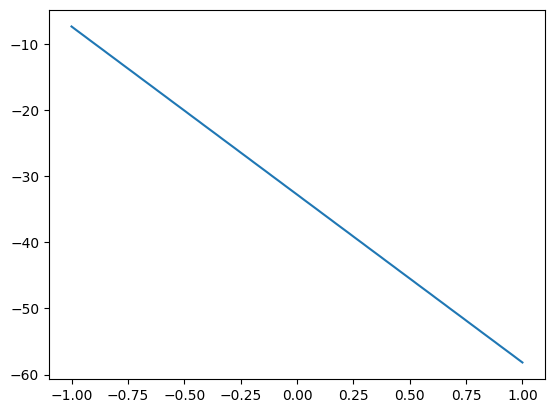

In [154]:
import matplotlib.pyplot as plt

interval = np.linspace(-1,1,num=100)
BHI = []
for i in interval:
    parameters["Temperature"] = i
    BHI.append(calcul_BHI(parameters))

plt.plot(interval,BHI)